In [3]:
pip install pyspark

In [4]:
from pyspark.sql import SparkSession
spark = (SparkSession.builder.appName("PySpark_Tutorial").getOrCreate())

In [5]:
spark

In [6]:
data1 = spark.read.csv("/content/Employe_Performance_dataset.csv", header=True, inferSchema=True)
data1.show()

+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|              Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
|  1|      Cory Escobar| 48|Female|        HR|  5641|  2015-05-03|              2.0|        16|  Active|   New York|  Night|
|  2|   Timothy Sanchez| 25| Other|     Sales|  4249|  2020-11-09|              2.0|        11|Inactive|Los Angeles|Evening|
|  3|      Chad Nichols| 57| Other|     Sales|  3058|  2019-02-12|             NULL|         1|Inactive|   New York|Morning|
|  4|Christine Williams| 58|Female|        IT|  5895|  2017-09-08|              2.0|        13|Inactive|Los Angeles|Evening|
|  5|      Amber Harris| 35| Other|        IT|  4317|  2020-02-15|              5.0|        16|Inactive|   New York|Evening|


In [7]:
from pyspark.sql.functions import *
mode_data = data1.select(mode("Performance Score")).collect()[0][0]
data1 = data1.fillna({"Performance Score": mode_data})
data1.show()

+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|              Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
|  1|      Cory Escobar| 48|Female|        HR|  5641|  2015-05-03|              2.0|        16|  Active|   New York|  Night|
|  2|   Timothy Sanchez| 25| Other|     Sales|  4249|  2020-11-09|              2.0|        11|Inactive|Los Angeles|Evening|
|  3|      Chad Nichols| 57| Other|     Sales|  3058|  2019-02-12|              2.0|         1|Inactive|   New York|Morning|
|  4|Christine Williams| 58|Female|        IT|  5895|  2017-09-08|              2.0|        13|Inactive|Los Angeles|Evening|
|  5|      Amber Harris| 35| Other|        IT|  4317|  2020-02-15|              5.0|        16|Inactive|   New York|Evening|


In [8]:
mrng_pl = data1.filter(data1["Session"] == "Morning")
mrng_pl.show()
unique_values = mrng_pl.select("Department").distinct()
unique_values.show()

+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|              Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
|  3|      Chad Nichols| 57| Other|     Sales|  3058|  2019-02-12|              2.0|         1|Inactive|   New York|Morning|
| 10|    Brian Faulkner| 30|  Male|        IT|  8202|  2018-05-26|              1.0|         9|  Active|Los Angeles|Morning|
| 16|       Gary Cooley| 62|  Male|        HR|  5386|  2017-07-25|              2.0|         2|Inactive|    Chicago|Morning|
| 18|Jacqueline Randall| 31|Female|        HR|  3519|  2018-05-18|              4.0|         6|  Active|   New York|Morning|
| 25|     Tracy Carlson| 21|  Male|        HR|  9275|  2022-04-09|              4.0|        12|  Active|   New York|Morning|


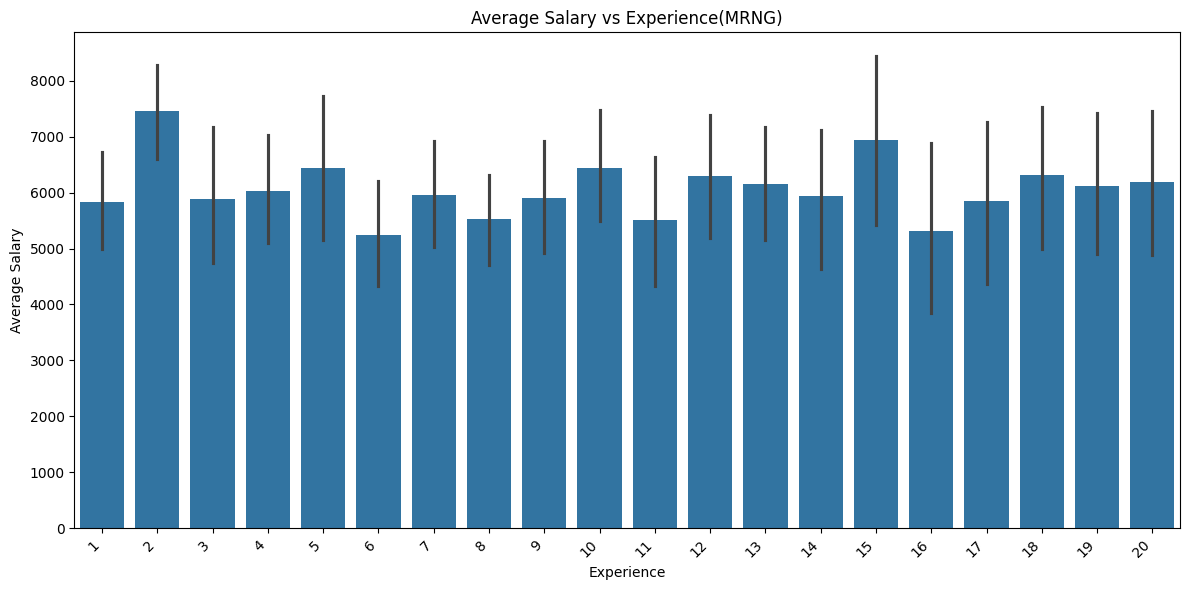

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mrng_pl_pd = mrng_pl.select("Salary", "Experience").toPandas()

# Generate Bar Plot: Create a bar plot using a suitable plotting library (like Matplotlib or Seaborn) to visualize the average salary for each experience level.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=mrng_pl_pd, x='Experience', y='Salary')
plt.title('Average Salary vs Experience(MRNG)')
plt.xlabel('Experience')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display Plot: Show the generated plot.
plt.show()

+---+--------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|                Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+--------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
|  3|        Chad Nichols| 57| Other|     Sales|  3058|  2019-02-12|              2.0|         1|Inactive|   New York|Morning|
| 32|   Jacqueline Becker| 63| Other|     Sales|  4270|  2021-12-16|              2.0|        20|Inactive|Los Angeles|Morning|
| 49|          Jamie Wood| 46|  Male|     Sales|  2773|  2023-02-25|              4.0|         9|  Active|   New York|Morning|
| 51|       Jamie Gregory| 27| Other|     Sales|  3253|  2015-12-07|              2.0|        12|  Active|    Chicago|Morning|
| 53|       Steve Salinas| 42| Other|     Sales|  6567|  2022-03-26|              2.0|        19|Inactive|Los A

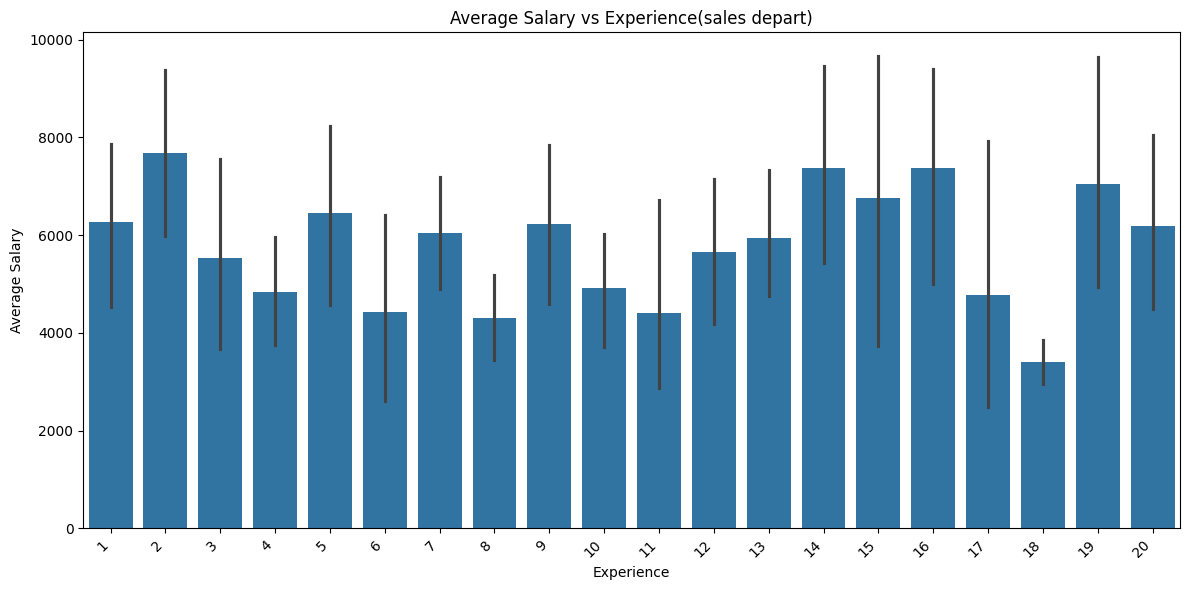

In [10]:
mrng_pl_sales = mrng_pl.filter(mrng_pl["Department"] == "Sales")
mrng_pl_sales.show()

mrng_pl_sales_pd = mrng_pl_sales.select("Salary", "Experience").toPandas()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=mrng_pl_sales_pd, x='Experience', y='Salary')
plt.title('Average Salary vs Experience(sales depart)')
plt.xlabel('Experience')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

+---+-------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|               Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+-------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| 16|        Gary Cooley| 62|  Male|        HR|  5386|  2017-07-25|              2.0|         2|Inactive|    Chicago|Morning|
| 18| Jacqueline Randall| 31|Female|        HR|  3519|  2018-05-18|              4.0|         6|  Active|   New York|Morning|
| 25|      Tracy Carlson| 21|  Male|        HR|  9275|  2022-04-09|              4.0|        12|  Active|   New York|Morning|
| 28|      Jordan Warren| 55|Female|        HR|  4608|  2018-07-07|              2.0|        18|Inactive|Los Angeles|Morning|
| 47|       Alicia Scott| 47|Female|        HR|  7966|  2019-09-03|              2.0|         8|Inactive|   New York|M

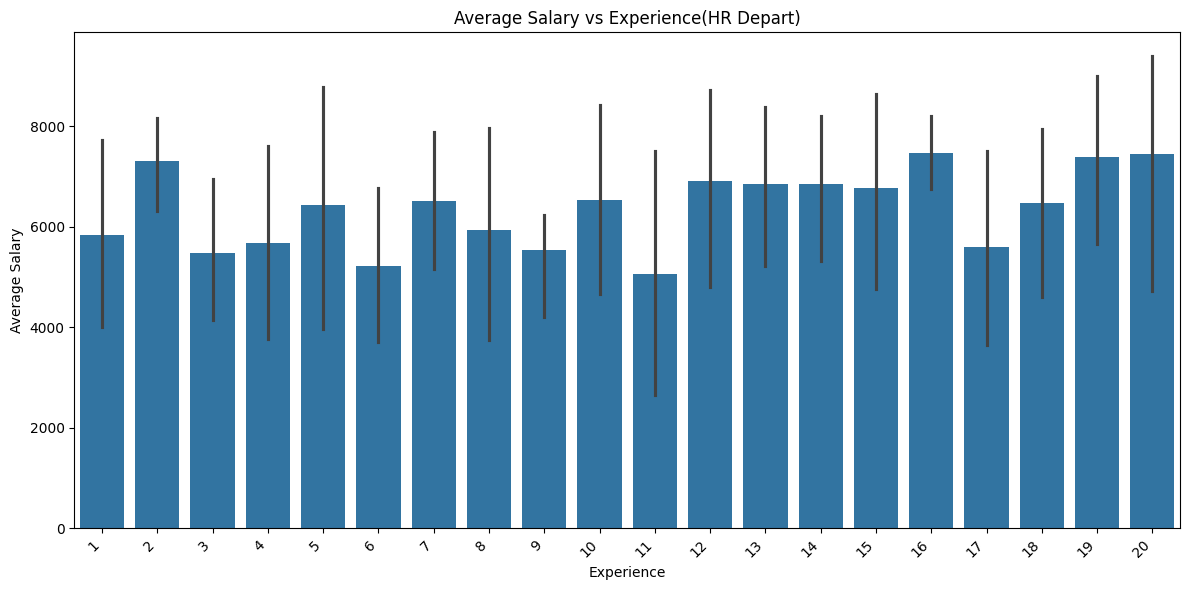

In [11]:
mrng_pl_HR = mrng_pl.filter(mrng_pl["Department"] == "HR")
mrng_pl_HR.show()
mrng_pl_HR_pd = mrng_pl_HR.select("Salary", "Experience").toPandas()

plt.figure(figsize=(12, 6))
sns.barplot(data=mrng_pl_HR_pd, x='Experience', y='Salary')
plt.title('Average Salary vs Experience(HR Depart)')
plt.xlabel('Experience')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

+---+-----------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|             Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+-----------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| 10|   Brian Faulkner| 30|  Male|        IT|  8202|  2018-05-26|              1.0|         9|  Active|Los Angeles|Morning|
| 29|  Vickie Campbell| 65|Female|        IT|  9190|  2019-10-28|              2.0|        12|Inactive|    Chicago|Morning|
| 42|   Charles Mccall| 58| Other|        IT|  9512|  2024-11-10|              2.0|         8|Inactive|Los Angeles|Morning|
| 45|   Daniel Aguirre| 20| Other|        IT|  4184|  2017-10-03|              2.0|        13|  Active|   New York|Morning|
| 70|      Erica James| 64|Female|        IT|  2442|  2020-09-28|              2.0|        14|Inactive|Los Angeles|Morning|
| 76|   

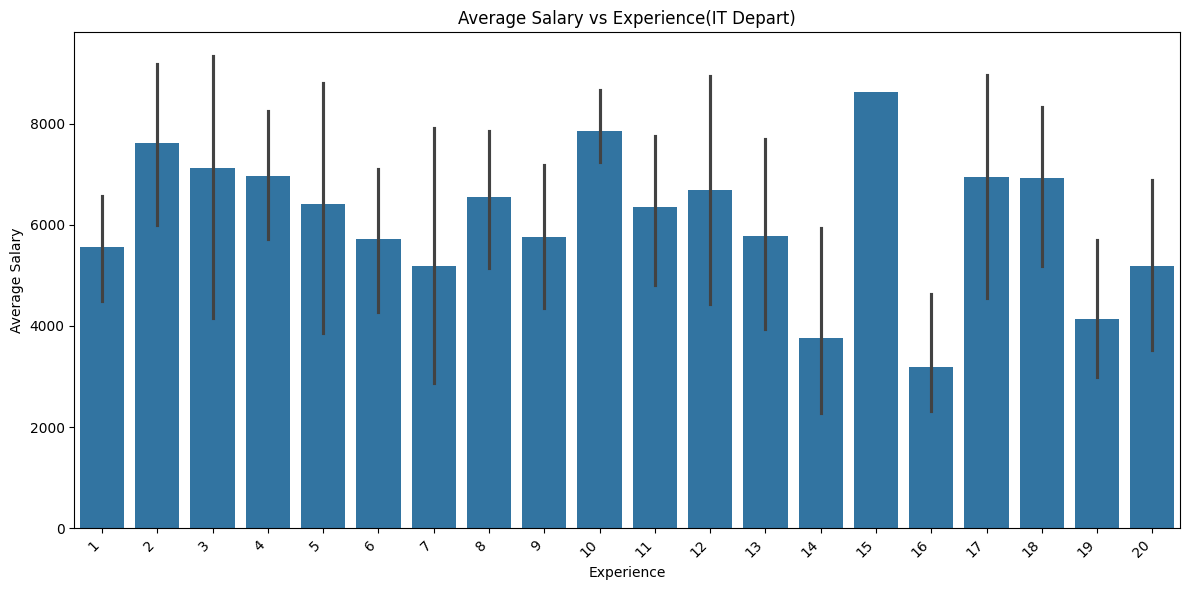

In [12]:
mrng_pl_IT = mrng_pl.filter(mrng_pl["Department"] == "IT")
mrng_pl_IT.show()
mrng_pl_IT_pd = mrng_pl_IT.select("Salary", "Experience").toPandas()

plt.figure(figsize=(12, 6))
sns.barplot(data=mrng_pl_IT_pd, x='Experience', y='Salary')
plt.title('Average Salary vs Experience(IT Depart)')
plt.xlabel('Experience')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|              Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
|  2|   Timothy Sanchez| 25| Other|     Sales|  4249|  2020-11-09|              2.0|        11|Inactive|Los Angeles|Evening|
|  4|Christine Williams| 58|Female|        IT|  5895|  2017-09-08|              2.0|        13|Inactive|Los Angeles|Evening|
|  5|      Amber Harris| 35| Other|        IT|  4317|  2020-02-15|              5.0|        16|Inactive|   New York|Evening|
|  6|       Ashley Howe| 29|Female|        HR|  2591|  2016-06-24|              1.0|         6|  Active|    Chicago|Evening|
|  8|      Amanda Baker| 52| Other|        HR|  6285|  2015-04-01|              2.0|         8|Inactive|    Chicago|Evening|


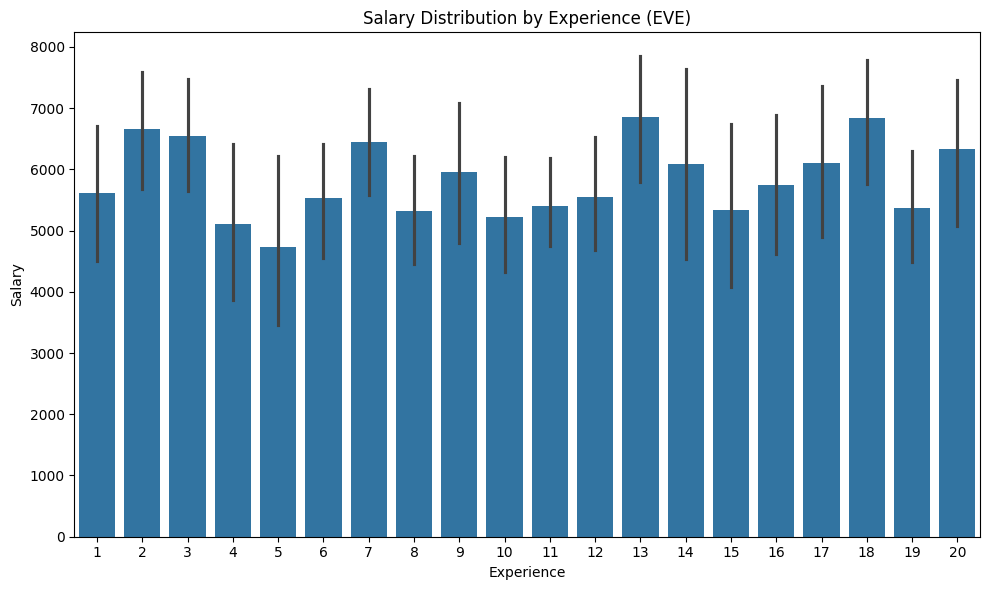

In [13]:
eve_pl = data1.filter(data1["Session"] == "Evening")
eve_pl.show()
eve_pl_pd = eve_pl.select("Salary", "Experience").toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(data=eve_pl_pd, x='Experience', y='Salary')
plt.title('Salary Distribution by Experience (EVE)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|              Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
|  2|   Timothy Sanchez| 25| Other|     Sales|  4249|  2020-11-09|              2.0|        11|Inactive|Los Angeles|Evening|
| 11|       Nicole Bell| 42|Female|     Sales|  5336|  2015-01-28|              3.0|         7|  Active|Los Angeles|Evening|
| 15|Matthew Collins MD| 31|Female|     Sales|  8568|  2020-06-01|              2.0|        20|Inactive|Los Angeles|Evening|
| 33|     Trevor Duncan| 65| Other|     Sales|  6547|  2024-06-10|              2.0|        10|  Active|    Chicago|Evening|
| 37|  Jacqueline Moore| 39|  Male|     Sales|  2364|  2018-02-25|              1.0|        15|  Active|Los Angeles|Evening|


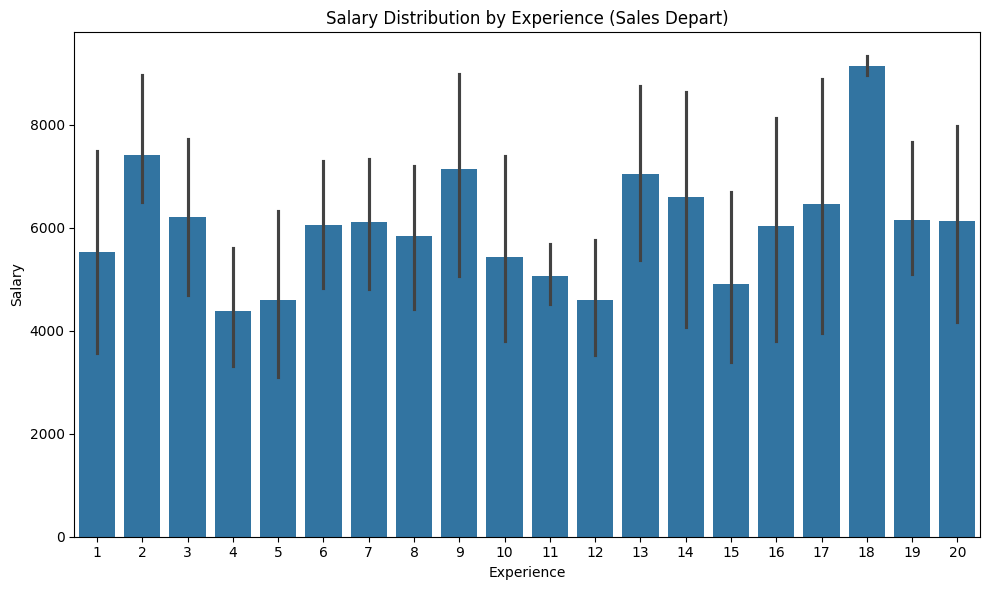

In [14]:
eve_pl_sales = eve_pl.filter(eve_pl["Department"] == "Sales")
eve_pl_sales.show()
eve_pl_sales_pd = eve_pl_sales.select("Salary", "Experience").toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(data=eve_pl_sales_pd, x='Experience', y='Salary')
plt.title('Salary Distribution by Experience (Sales Depart)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

+---+---------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|           Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+---------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
|  6|    Ashley Howe| 29|Female|        HR|  2591|  2016-06-24|              1.0|         6|  Active|    Chicago|Evening|
|  8|   Amanda Baker| 52| Other|        HR|  6285|  2015-04-01|              2.0|         8|Inactive|    Chicago|Evening|
| 17| Jonathan Perez| 59|  Male|        HR|  6586|  2019-02-19|              3.0|         7|Inactive|Los Angeles|Evening|
| 20|   Victoria Fox| 57|Female|        HR|  7251|  2023-06-07|              2.0|        10|  Active|Los Angeles|Evening|
| 24|Marissa Stewart| 31|Female|        HR|  5386|  2021-01-30|              2.0|         3|  Active|Los Angeles|Evening|
| 26| Tara Blackwell| 30

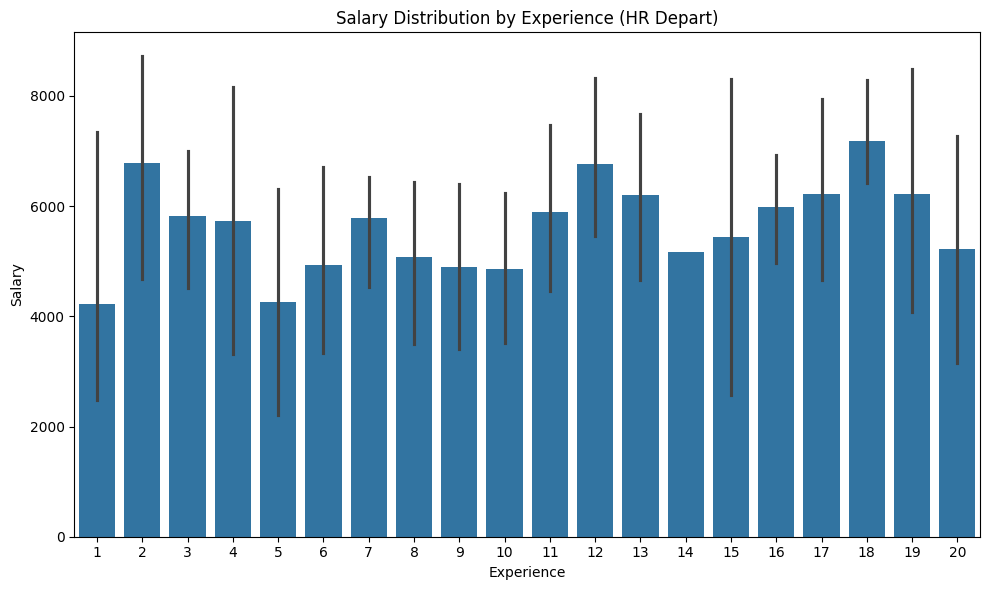

In [15]:
eve_pl_HR = eve_pl.filter(eve_pl["Department"] == "HR")
eve_pl_HR.show()
eve_pl_HR_pd = eve_pl_HR.select("Salary", "Experience").toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(data=eve_pl_HR_pd, x='Experience', y='Salary')
plt.title('Salary Distribution by Experience (HR Depart)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|              Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
|  4|Christine Williams| 58|Female|        IT|  5895|  2017-09-08|              2.0|        13|Inactive|Los Angeles|Evening|
|  5|      Amber Harris| 35| Other|        IT|  4317|  2020-02-15|              5.0|        16|Inactive|   New York|Evening|
| 36|       Kevin Watts| 35|  Male|        IT|  9078|  2019-06-12|              1.0|         7|Inactive|Los Angeles|Evening|
| 64|   Katherine Clark| 39|Female|        IT|  2585|  2023-02-17|              2.0|         1|  Active|Los Angeles|Evening|
| 80|        Mary Singh| 39| Other|        IT|  5562|  2019-07-06|              2.0|         7|Inactive|   New York|Evening|


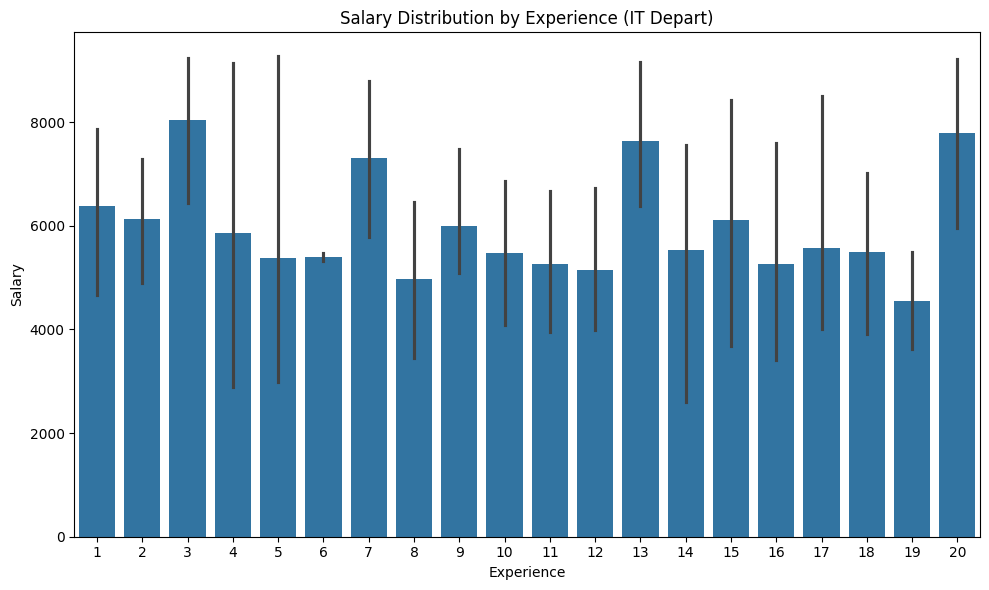

In [16]:
eve_pl_IT = eve_pl.filter(eve_pl["Department"] == "IT")
eve_pl_IT.show()
eve_pl_IT_pd = eve_pl_IT.select("Salary", "Experience").toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(data=eve_pl_IT_pd, x='Experience', y='Salary')
plt.title('Salary Distribution by Experience (IT Depart)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

+---+--------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|                Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+--------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
|  1|        Cory Escobar| 48|Female|        HR|  5641|  2015-05-03|              2.0|        16|  Active|   New York|  Night|
|  7|         David Olson| 39|Female|     Sales|  6826|  2023-05-11|              2.0|         4|  Active|   New York|  Night|
|  9|       Jeremy Wright| 63|Female|     Sales|  9862|  2024-02-07|              2.0|         3|Inactive|   New York|  Night|
| 12|   Rodney Richardson| 60| Other|        HR|  6908|  2015-03-14|              4.0|        19|  Active|    Chicago|  Night|
| 13|     Joshua Robinson| 61|  Male|        IT|  5688|  2020-06-21|              2.0|         4|Inactive|    C

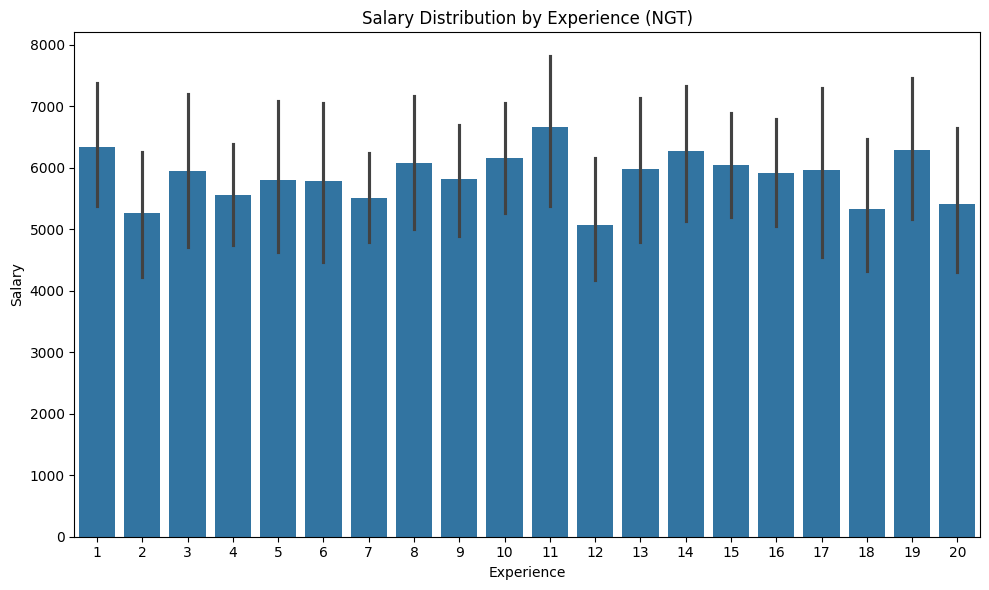

In [17]:
ngt_pl = data1.filter(data1['Session'] == "Night")
ngt_pl.show()
ngt_pl_pd = ngt_pl.select("Salary", "Experience").toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(data=ngt_pl_pd, x='Experience', y='Salary')
plt.title('Salary Distribution by Experience (NGT)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

+---+----------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|            Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+----------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
|  7|     David Olson| 39|Female|     Sales|  6826|  2023-05-11|              2.0|         4|  Active|   New York|  Night|
|  9|   Jeremy Wright| 63|Female|     Sales|  9862|  2024-02-07|              2.0|         3|Inactive|   New York|  Night|
| 21|   Heather Jones| 35|  Male|     Sales|  4565|  2018-02-07|              2.0|         9|  Active|    Chicago|  Night|
| 23|    Bryce Carter| 35|Female|     Sales|  9598|  2015-12-16|              4.0|         4|Inactive|   New York|  Night|
| 30|   Rachel Ramsey| 22|  Male|     Sales|  9661|  2016-08-18|              2.0|        17|Inactive|    Chicago|  Night|
| 54|  Taylor Gr

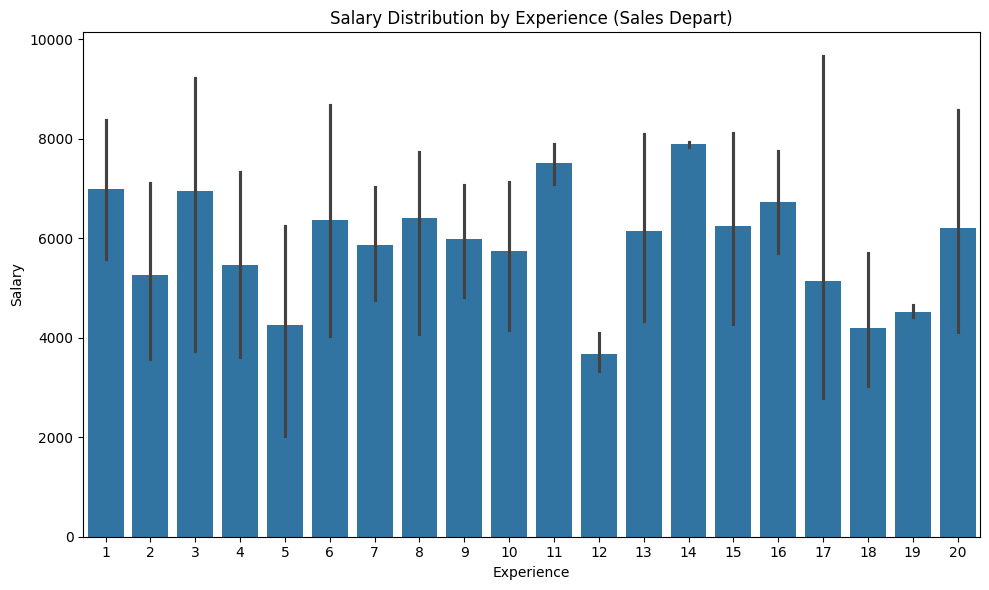

In [18]:
ngt_pl_sales = ngt_pl.filter(ngt_pl["Department"] == "Sales")
ngt_pl_sales.show()
ngt_pl_sales_pd = ngt_pl_sales.select("Salary", "Experience").toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(data=ngt_pl_sales_pd, x='Experience', y='Salary')
plt.title('Salary Distribution by Experience (Sales Depart)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

+---+--------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|                Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+--------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
|  1|        Cory Escobar| 48|Female|        HR|  5641|  2015-05-03|              2.0|        16|  Active|   New York|  Night|
| 12|   Rodney Richardson| 60| Other|        HR|  6908|  2015-03-14|              4.0|        19|  Active|    Chicago|  Night|
| 19|      Nancy Stephens| 38|  Male|        HR|  9061|  2017-07-16|              5.0|        16|Inactive|    Chicago|  Night|
| 22|       Stacie Porter| 61|Female|        HR|  4071|  2020-05-04|              2.0|         9|Inactive|    Chicago|  Night|
| 38|       Lawrence Rose| 18|Female|        HR|  2904|  2021-04-11|              1.0|        17|Inactive|    C

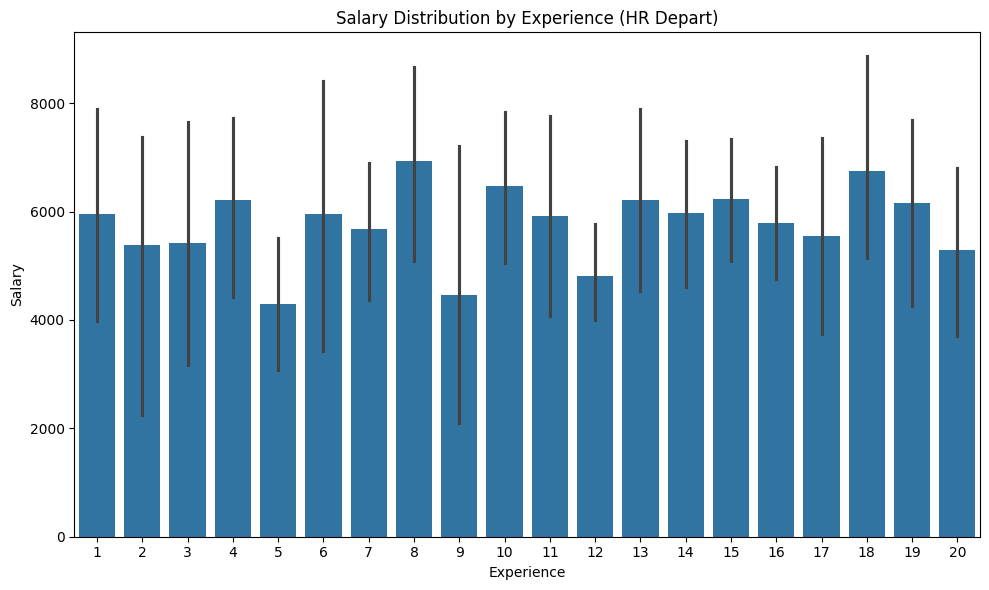

In [19]:
ngt_pl_HR = ngt_pl.filter(ngt_pl["Department"] == "HR")
ngt_pl_HR.show()
ngt_pl_HR_pd = ngt_pl_HR.select("Salary", "Experience").toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(data=ngt_pl_HR_pd, x='Experience', y='Salary')
plt.title('Salary Distribution by Experience (HR Depart)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

+---+-------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|               Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+-------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| 13|    Joshua Robinson| 61|  Male|        IT|  5688|  2020-06-21|              2.0|         4|Inactive|    Chicago|  Night|
| 14|  Benjamin Callahan| 34|  Male|        IT|  5593|  2019-06-23|              2.0|         2|Inactive|Los Angeles|  Night|
| 27|        Austin Long| 20|Female|        IT|  4899|  2024-05-01|              5.0|         8|Inactive|    Chicago|  Night|
| 31|       Brandi Smith| 21| Other|        IT|  4780|  2020-01-20|              1.0|         7|Inactive|   New York|  Night|
| 34|   Mr. Brian Nelson| 42|Female|        IT|  5207|  2017-08-17|              1.0|         4|  Active|Los Angeles| 

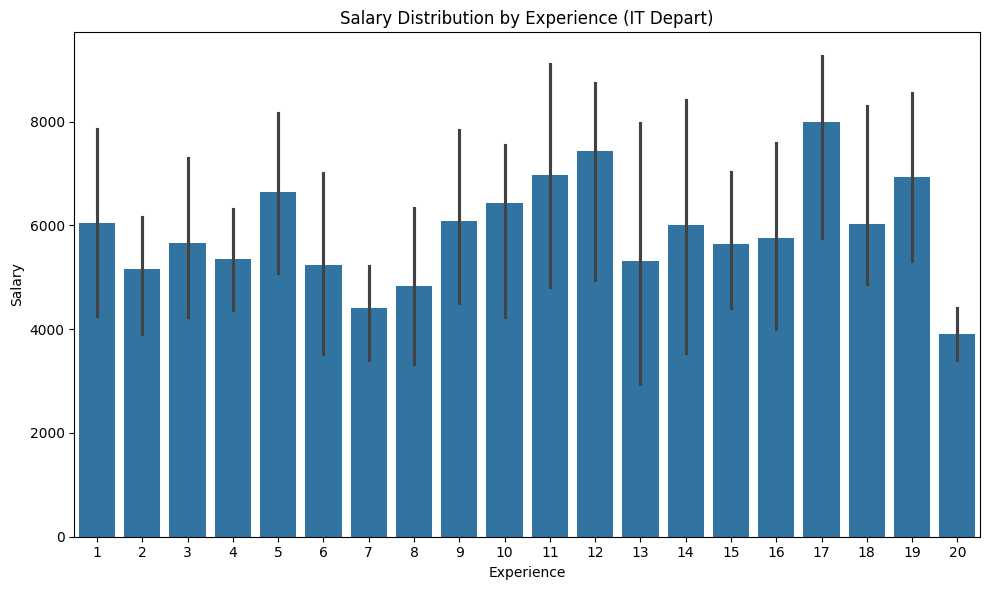

In [20]:
ngt_pl_IT = ngt_pl.filter(ngt_pl["Department"] == "IT")
ngt_pl_IT.show()
ngt_pl_IT_pd = ngt_pl_IT.select("Salary", "Experience").toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(data=ngt_pl_IT_pd, x='Experience', y='Salary')
plt.title('Salary Distribution by Experience (IT Depart)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

In [21]:
from pyspark.sql import SparkSession
spark = (SparkSession.builder.appName("PySpark_Tutorial").getOrCreate())

from pyspark.ml.feature import VectorAssembler
input_col = ["Salary", "Experience"]
assembler = VectorAssembler(inputCols= input_col, outputCol = "feature")
data_with_vector = assembler.transform(data1)
data_with_vector.show()

+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+-------------+
| ID|              Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|      feature|
+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+-------------+
|  1|      Cory Escobar| 48|Female|        HR|  5641|  2015-05-03|              2.0|        16|  Active|   New York|  Night|[5641.0,16.0]|
|  2|   Timothy Sanchez| 25| Other|     Sales|  4249|  2020-11-09|              2.0|        11|Inactive|Los Angeles|Evening|[4249.0,11.0]|
|  3|      Chad Nichols| 57| Other|     Sales|  3058|  2019-02-12|              2.0|         1|Inactive|   New York|Morning| [3058.0,1.0]|
|  4|Christine Williams| 58|Female|        IT|  5895|  2017-09-08|              2.0|        13|Inactive|Los Angeles|Evening|[5895.0,13.0]|
|  5|      Amber Harris| 35

In [22]:
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="Gender", outputCol="GenderIndex")
indexer_model = indexer.fit(data1)
data_indexed = indexer_model.transform(data1)
data_indexed.show()

+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+-----------+
| ID|              Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|GenderIndex|
+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+-----------+
|  1|      Cory Escobar| 48|Female|        HR|  5641|  2015-05-03|              2.0|        16|  Active|   New York|  Night|        1.0|
|  2|   Timothy Sanchez| 25| Other|     Sales|  4249|  2020-11-09|              2.0|        11|Inactive|Los Angeles|Evening|        0.0|
|  3|      Chad Nichols| 57| Other|     Sales|  3058|  2019-02-12|              2.0|         1|Inactive|   New York|Morning|        0.0|
|  4|Christine Williams| 58|Female|        IT|  5895|  2017-09-08|              2.0|        13|Inactive|Los Angeles|Evening|        1.0|
|  5|      Amber Harris| 35| Other|      

# **PREDICTING THE SALARY OF A PERSON IN MORNING SESSION IN SALES DEPARTMENT**

# Task
Apply linear regression to the mrng_pl_sales to predict the salary of a person based on their experience and session. Split the data, build and train a linear regression model, evaluate the model, and create input fields for the user to provide new experience and session values to predict the salary.

## Prepare data

### Subtask:
Select 'Experience' and 'Session' as features and 'Salary' as the label from the `mrng_pl_sales` DataFrame and assemble the features into a vector.


**Reasoning**:
Select 'Experience' and 'Session' as features and 'Salary' as the label from the `mrng_pl_sales` DataFrame and assemble the features into a vector.



In [37]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

indexer = StringIndexer(inputCol="Session", outputCol="SessionIndex")
mrng_pl_sales_indexed = indexer.fit(mrng_pl_sales).transform(mrng_pl_sales)

assembler = VectorAssembler(inputCols=["Experience", "SessionIndex"], outputCol="features")
mrng_pl_sales_with_features = assembler.transform(mrng_pl_sales_indexed)
final_data = mrng_pl_sales_with_features.select("features", "Salary")
final_data.show()

+----------+------+
|  features|Salary|
+----------+------+
| [1.0,0.0]|  3058|
|[20.0,0.0]|  4270|
| [9.0,0.0]|  2773|
|[12.0,0.0]|  3253|
|[19.0,0.0]|  6567|
|[11.0,0.0]|  2851|
| [4.0,0.0]|  3718|
| [4.0,0.0]|  4897|
|[14.0,0.0]|  5432|
| [9.0,0.0]|  8076|
|[20.0,0.0]|  7263|
|[18.0,0.0]|  3843|
| [6.0,0.0]|  3128|
| [9.0,0.0]|  8154|
| [7.0,0.0]|  4286|
|[11.0,0.0]|  3829|
|[20.0,0.0]|  3591|
|[10.0,0.0]|  6429|
| [5.0,0.0]|  2364|
|[13.0,0.0]|  3479|
+----------+------+
only showing top 20 rows



## Split data

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Split the data into training and testing sets and display the first few rows of each.



In [38]:
training_data, testing_data = final_data.randomSplit([0.8, 0.2], seed=42)
training_data.show()
testing_data.show()

+---------+------+
| features|Salary|
+---------+------+
|[1.0,0.0]|  3058|
|[1.0,0.0]|  4385|
|[1.0,0.0]|  6578|
|[1.0,0.0]|  7876|
|[1.0,0.0]|  9181|
|[2.0,0.0]|  9375|
|[3.0,0.0]|  2640|
|[3.0,0.0]|  2683|
|[3.0,0.0]|  4232|
|[3.0,0.0]|  5278|
|[3.0,0.0]|  9356|
|[3.0,0.0]|  9377|
|[4.0,0.0]|  3395|
|[4.0,0.0]|  3718|
|[4.0,0.0]|  4897|
|[4.0,0.0]|  7080|
|[5.0,0.0]|  2364|
|[5.0,0.0]|  3153|
|[5.0,0.0]|  7570|
|[5.0,0.0]|  8119|
+---------+------+
only showing top 20 rows

+----------+------+
|  features|Salary|
+----------+------+
| [1.0,0.0]|  6509|
| [2.0,0.0]|  5988|
| [3.0,0.0]|  2489|
| [3.0,0.0]|  8189|
| [4.0,0.0]|  5086|
| [5.0,0.0]|  5282|
| [6.0,0.0]|  3128|
| [7.0,0.0]|  5081|
| [8.0,0.0]|  4226|
| [8.0,0.0]|  4303|
| [8.0,0.0]|  4750|
| [8.0,0.0]|  5819|
| [9.0,0.0]|  2773|
| [9.0,0.0]|  8154|
|[10.0,0.0]|  6429|
|[12.0,0.0]|  3253|
|[13.0,0.0]|  4269|
|[19.0,0.0]|  9653|
+----------+------+



## Build model

### Subtask:
Create a Linear Regression model.


**Reasoning**:
Import the LinearRegression class and instantiate a LinearRegression object.



In [39]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol='features', labelCol='Salary')

## Train model

### Subtask:
Train the Linear Regression model on the training data.


**Reasoning**:
Fit the Linear Regression model to the training data to train it.



In [40]:
lr_model = lr.fit(training_data)

## Evaluate model

### Subtask:
Evaluate the trained Linear Regression model on the testing data.


**Reasoning**:
Evaluate the trained Linear Regression model on the testing data by making predictions and calculating RMSE and R2.



In [72]:
from pyspark.ml.evaluation import RegressionEvaluator

predictions = lr_model.transform(testing_data)
evaluator = RegressionEvaluator(labelCol="Salary", predictionCol="prediction")
rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

print(f"Root Mean Squared Error (RMSE) on testing data: {rmse}")
print(f"R-squared (R2) on testing data: {r2}")

Root Mean Squared Error (RMSE) on testing data: 2203.5158529187693
R-squared (R2) on testing data: 0.010442687331645994


## Get user input

### Subtask:
Create input fields for the user to enter the new person's experience and session.


**Reasoning**:
Use the input function to prompt the user for experience and session, converting experience to an integer.



In [71]:
new_experience_str = input("Enter the new person's experience: ")
new_experience = int(new_experience_str)
new_session = input("Enter the new person's session (Morning, Evening, or Night): ")

Enter the new person's experience: 10
Enter the new person's session (Morning, Evening, or Night): Morning


## Predict salary

### Subtask:
Use the trained model and the user's input to predict the salary.


**Reasoning**:
Create a new DataFrame with the user input, apply the pre-fitted StringIndexer and VectorAssembler to transform the data, and then use the trained linear regression model to make a prediction.



In [73]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

indexer = StringIndexer(inputCol="Session", outputCol="SessionIndex")
indexer_model = indexer.fit(mrng_pl_sales)

new_data = spark.createDataFrame([Row(Experience=new_experience, Session=new_session)])
new_data_indexed = indexer_model.transform(new_data)
new_data_indexed.select("Experience", "Session", "SessionIndex").show()

+----------+-------+------------+
|Experience|Session|SessionIndex|
+----------+-------+------------+
|        10|Morning|         0.0|
+----------+-------+------------+



**Reasoning**:
The previous step successfully showed that 'SessionIndex' is now present in the transformed `new_data_indexed` DataFrame. This indicates that the `StringIndexer` was correctly fitted and applied. Now that the features are ready, we can proceed with applying the `assembler` and the trained `lr_model` to predict the salary for the new data.



In [74]:
new_data_with_features = assembler.transform(new_data_indexed)
predicted_salary = lr_model.transform(new_data_with_features).collect()[0]['prediction']

print(f"The predicted salary for the new person is: {predicted_salary}")

The predicted salary for the new person is: 6287.9624796448725


# Task
Apply linear regression to the "mrng_pl_HR" dataset to predict the salary of a person based on their experience and session. Follow these steps: Prepare data, Split data, Build model, Train model, Evaluate model, and Finish task. Include input fields for the user to provide new experience and session values for prediction.

## Prepare data

### Subtask:
Select 'Experience' and 'Session' as features and 'Salary' as the label from the `mrng_pl_HR` DataFrame and assemble the features into a vector.


**Reasoning**:
Import necessary PySpark modules, index the 'Session' column, assemble the 'Experience' and 'SessionIndex' columns into a single feature vector, and select the features and label columns for the final dataset. Then display the first few rows of the final dataset.



In [57]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

indexer = StringIndexer(inputCol="Session", outputCol="SessionIndex")
mrng_pl_HR_indexed = indexer.fit(mrng_pl_HR).transform(mrng_pl_HR)

assembler = VectorAssembler(inputCols=["Experience", "SessionIndex"], outputCol="features")
mrng_pl_HR_with_features = assembler.transform(mrng_pl_HR_indexed)
final_data = mrng_pl_HR_with_features.select("features", "Salary")
final_data.show()

+----------+------+
|  features|Salary|
+----------+------+
| [2.0,0.0]|  5386|
| [6.0,0.0]|  3519|
|[12.0,0.0]|  9275|
|[18.0,0.0]|  4608|
| [8.0,0.0]|  7966|
|[14.0,0.0]|  8386|
|[11.0,0.0]|  2077|
| [3.0,0.0]|  3488|
|[17.0,0.0]|  2166|
| [1.0,0.0]|  7187|
|[15.0,0.0]|  9941|
|[19.0,0.0]|  9973|
|[19.0,0.0]|  3003|
|[17.0,0.0]|  4056|
|[19.0,0.0]|  9930|
| [1.0,0.0]|  3514|
| [8.0,0.0]|  8416|
|[10.0,0.0]|  3517|
| [3.0,0.0]|  4751|
| [8.0,0.0]|  7067|
+----------+------+
only showing top 20 rows



## Split data

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Split the data into training and testing sets and display the first few rows of each.



In [58]:
training_data, testing_data = final_data.randomSplit([0.8, 0.2], seed=42)
training_data.show()
testing_data.show()

+---------+------+
| features|Salary|
+---------+------+
|[1.0,0.0]|  2873|
|[1.0,0.0]|  3514|
|[1.0,0.0]|  7187|
|[1.0,0.0]|  8297|
|[1.0,0.0]|  8958|
|[2.0,0.0]|  5386|
|[2.0,0.0]|  7485|
|[2.0,0.0]|  8147|
|[2.0,0.0]|  8191|
|[2.0,0.0]|  8526|
|[3.0,0.0]|  3488|
|[3.0,0.0]|  4524|
|[3.0,0.0]|  4751|
|[3.0,0.0]|  6899|
|[3.0,0.0]|  7767|
|[4.0,0.0]|  2973|
|[4.0,0.0]|  3340|
|[4.0,0.0]|  5735|
|[4.0,0.0]|  9098|
|[4.0,0.0]|  9207|
+---------+------+
only showing top 20 rows

+----------+------+
|  features|Salary|
+----------+------+
| [1.0,0.0]|  4213|
| [2.0,0.0]|  4713|
| [2.0,0.0]|  7378|
| [2.0,0.0]|  8733|
| [4.0,0.0]|  2477|
| [4.0,0.0]|  6877|
| [5.0,0.0]|  8758|
| [6.0,0.0]|  4347|
| [8.0,0.0]|  7966|
| [8.0,0.0]|  8416|
| [9.0,0.0]|  4215|
| [9.0,0.0]|  6247|
|[10.0,0.0]|  3659|
|[10.0,0.0]|  9861|
|[12.0,0.0]|  6610|
|[13.0,0.0]|  7388|
|[14.0,0.0]|  8844|
|[19.0,0.0]|  9973|
+----------+------+



## Build model

### Subtask:
Create a Linear Regression model.


**Reasoning**:
Import the LinearRegression class and instantiate a LinearRegression object.



In [59]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol='features', labelCol='Salary')

## Train model

### Subtask:
Train the Linear Regression model on the training data.


**Reasoning**:
Fit the Linear Regression model to the training data to train it.



In [60]:
lr_model = lr.fit(training_data)

**Reasoning**:
Evaluate the trained Linear Regression model on the testing data by making predictions and calculating RMSE and R2.



In [61]:
from pyspark.ml.evaluation import RegressionEvaluator

predictions = lr_model.transform(testing_data)
evaluator = RegressionEvaluator(labelCol="Salary", predictionCol="prediction")
rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

print(f"Root Mean Squared Error (RMSE) on testing data: {rmse}")
print(f"R-squared (R2) on testing data: {r2}")

Root Mean Squared Error (RMSE) on testing data: 2203.5158529187693
R-squared (R2) on testing data: 0.010442687331645994


**Reasoning**:
Use the input function to prompt the user for experience and session, converting experience to an integer.



In [62]:
from pyspark.sql import Row

new_experience_str = input("Enter the new person's experience: ")
new_experience = int(new_experience_str)
new_session = input("Enter the new person's session (Morning, Evening, or Night): ")

Enter the new person's experience: 10
Enter the new person's session (Morning, Evening, or Night): Morning


**Reasoning**:
Create a new DataFrame with the user input, apply the pre-fitted StringIndexer and VectorAssembler to transform the data, and then use the trained linear regression model to make a prediction.



In [63]:
new_data = spark.createDataFrame([Row(Experience=new_experience, Session=new_session)])
new_data_indexed = indexer_model.transform(new_data)
new_data_with_features = assembler.transform(new_data_indexed)
predicted_salary = lr_model.transform(new_data_with_features).collect()[0]['prediction']

print(f"The predicted salary for the new person is: {predicted_salary}")

The predicted salary for the new person is: 6287.9624796448725


## Evaluate model

### Subtask:
Evaluate the trained Linear Regression model on the testing data.


**Reasoning**:
Evaluate the trained Linear Regression model on the testing data by making predictions and calculating RMSE and R2.



In [64]:
from pyspark.ml.evaluation import RegressionEvaluator

predictions = lr_model.transform(testing_data)
evaluator = RegressionEvaluator(labelCol="Salary", predictionCol="prediction")
rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

print(f"Root Mean Squared Error (RMSE) on testing data: {rmse}")
print(f"R-squared (R2) on testing data: {r2}")

Root Mean Squared Error (RMSE) on testing data: 2203.5158529187693
R-squared (R2) on testing data: 0.010442687331645994


## Get user input

### Subtask:
Create input fields for the user to enter the new person's experience and session.


**Reasoning**:
Use the input function to prompt the user for experience and session, converting experience to an integer.



In [65]:
new_experience_str = input("Enter the new person's experience: ")
new_experience = int(new_experience_str)
new_session = input("Enter the new person's session (Morning, Evening, or Night): ")

Enter the new person's experience: 10
Enter the new person's session (Morning, Evening, or Night): Morning


## Predict salary

### Subtask:
Use the trained model and the user's input to predict the salary.


**Reasoning**:
Create a new DataFrame with the user input, apply the previously fitted StringIndexer and VectorAssembler to transform the data, and then use the trained linear regression model to make a prediction.



In [66]:
from pyspark.sql import Row

new_data = spark.createDataFrame([Row(Experience=new_experience, Session=new_session)])
new_data_indexed = indexer_model.transform(new_data)
new_data_with_features = assembler.transform(new_data_indexed)
predicted_salary = lr_model.transform(new_data_with_features).collect()[0]['prediction']

print(f"The predicted salary for the new person is: {predicted_salary}")

The predicted salary for the new person is: 6287.9624796448725


## Summary:

### Data Analysis Key Findings

*   The data was successfully prepared by selecting 'Experience' and 'Session' as features and 'Salary' as the label, and the features were assembled into a vector.
*   The dataset was split into training and testing sets with an 80/20 ratio.
*   A Linear Regression model was built and trained on the training data.
*   The trained model was evaluated on the testing data, resulting in a Root Mean Squared Error (RMSE) of approximately 2203.52 and an R-squared (\(R^2\)) value of approximately 0.0104.
*   The process successfully obtained user input for new experience and session values.
*   Using the trained model and user input, a predicted salary of approximately 6287.96 was generated.

### Insights or Next Steps

*   The low \(R^2\) value suggests that 'Experience' and 'Session' alone are not strong predictors of 'Salary'. Exploring additional features could improve the model's performance.
*   Further analysis of the residuals could provide insights into where the model's predictions are less accurate.
